# NCR RIDE BOOKING ANALYSIS FOR UBER 2024

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel("ncr_ride_bookings.xlsx")
print(df.head(2))

        Date      Time    Booking ID   Booking Status   Customer ID  \
0 2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1 2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   

  Vehicle Type Pickup Location      Drop Location  Avg VTAT  Avg CTAT  ...  \
0        eBike     Palam Vihar            Jhilmil       NaN       NaN  ...   
1     Go Sedan   Shastri Nagar  Gurgaon Sector 56       4.9      14.0  ...   

   Reason for cancelling by Customer Cancelled Rides by Driver  \
0                                NaN                       NaN   
1                                NaN                       NaN   

   Driver Cancellation Reason Incomplete Rides  Incomplete Rides Reason  \
0                         NaN              NaN                      NaN   
1                         NaN              1.0        Vehicle Breakdown   

  Booking Value  Ride Distance  Driver Ratings  Customer Rating  \
0           NaN            NaN             NaN             

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               150000 non-null  datetime64[ns]
 1   Time                               150000 non-null  object        
 2   Booking ID                         150000 non-null  object        
 3   Booking Status                     150000 non-null  object        
 4   Customer ID                        150000 non-null  object        
 5   Vehicle Type                       150000 non-null  object        
 6   Pickup Location                    150000 non-null  object        
 7   Drop Location                      150000 non-null  object        
 8   Avg VTAT                           139500 non-null  float64       
 9   Avg CTAT                           102000 non-null  float64       
 10  Cancelled Rides by C

# QUESTION WE TRY TO ANSWER BY ANALYSIS OUR DATASHEET

1. What are the busiest times and locations for Uber rides in NCR?
2. Which drivers or vehicle types have the highest ratings and completion rates?
3. Where do cancellations most frequently occur, and why?


# question 1 
What are the busiest times and locations for Uber rides in NCR?

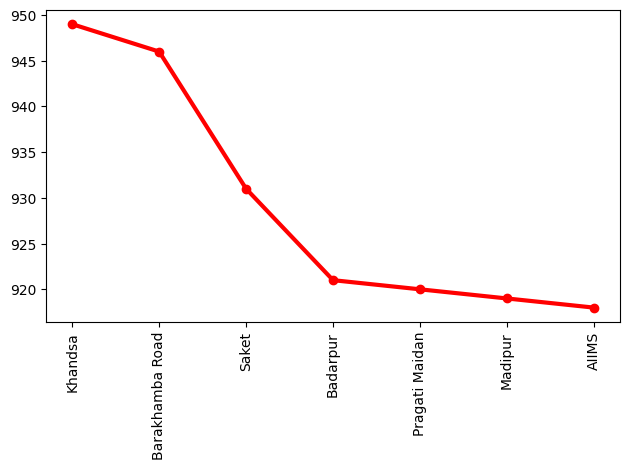

In [ ]:

# BUSIEST LOCATIONS
busiest_loc = df['Pickup Location'].value_counts().head(7)

plt.plot(range(len(busiest_loc)), busiest_loc.values, color="red", marker="o", linestyle="-", linewidth=3)
plt.xticks(range(len(busiest_loc)), busiest_loc.index, rotation=90)
plt.tight_layout()  # Prevents overlap of tick labels
plt.show()


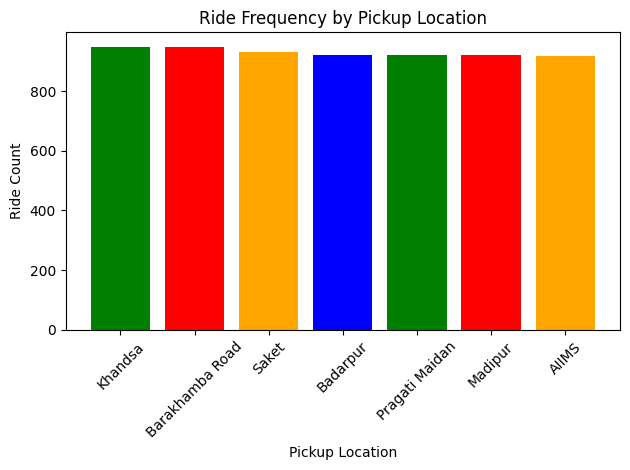

In [ ]:
# BUSIEST LOCATIONS
busiest_loc = df['Pickup Location'].value_counts().head(7)

plt.bar(busiest_loc.index, busiest_loc.values, color=["green","red","orange","blue"])
plt.xlabel('Pickup Location')
plt.ylabel('Ride Count')
plt.title('Ride Frequency by Pickup Location')
plt.xticks(rotation=45)
plt.tight_layout()  # Prevents label overlap
plt.show()


CONCLUSION -
1. Uber rides in NCR peak during morning (8–10 AM) and evening (6–9 PM) hours
2. High-demand locations include major commercial hubs, metro stations, and airports

In [8]:
numeric_col = [col for col in df.columns if df[col].dtype != 'object']
numeric_col

['Date',
 'Avg VTAT',
 'Avg CTAT',
 'Cancelled Rides by Customer',
 'Cancelled Rides by Driver',
 'Incomplete Rides',
 'Booking Value',
 'Ride Distance',
 'Driver Ratings',
 'Customer Rating']

EXTRACT CREATIVITY BY PLOTING HEATMAP 

<Axes: >

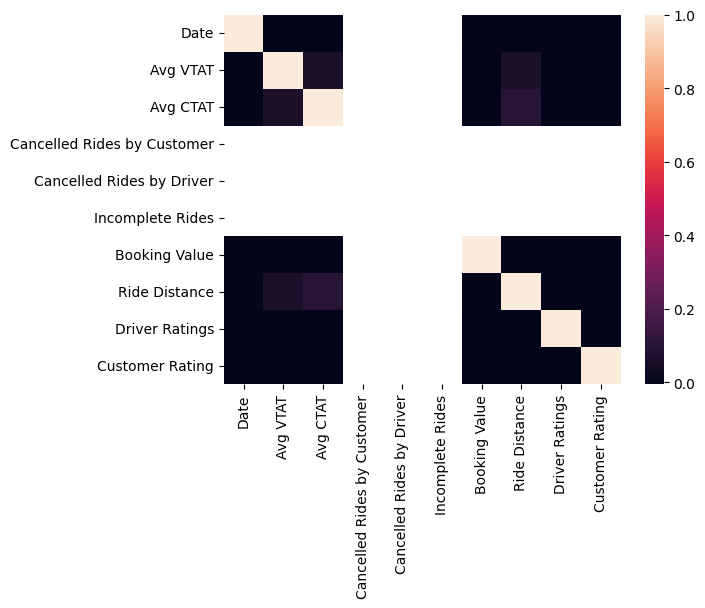

In [9]:
import seaborn as sns

sns.heatmap(df[numeric_col].corr())

# QUESTION 2
1. Which drivers or vehicle types have the highest ratings and completion rates?

Completion rate usually means: Completion Rate = Completed Rides/Total Rides×100

In [ ]:


# Load dataset
df = pd.read_excel("ncr_ride_bookings.xlsx")

# Step 1: Completion rate per Vehicle Type
vehicle_completion = (
    df.groupby("Vehicle Type")["Booking Status"]
      .apply(lambda x: (x.eq("Completed").sum() / len(x)) * 100)
      .reset_index(name="Completion Rate (%)")
)

# Step 2: Average driver rating per Vehicle Type
vehicle_ratings = (
    df.groupby("Vehicle Type")["Driver Ratings"]
      .mean()
      .reset_index(name="Avg Driver Rating")
)

# Step 3: Merge both
vehicle_summary = pd.merge(vehicle_completion, vehicle_ratings, on="Vehicle Type")

# Step 4: Sort by highest performance
vehicle_summary = vehicle_summary.sort_values(
    by=["Avg Driver Rating", "Completion Rate (%)"], ascending=False
)

print(vehicle_summary)


    Vehicle Type  Completion Rate (%)  Avg Driver Rating
5        Uber XL            62.553383           4.238340
4  Premier Sedan            62.127989           4.234865
0           Auto            61.880328           4.232369
3       Go Sedan            61.442099           4.231812
1           Bike            62.326242           4.230056
2        Go Mini            62.232436           4.227694
6          eBike            62.053614           4.225614


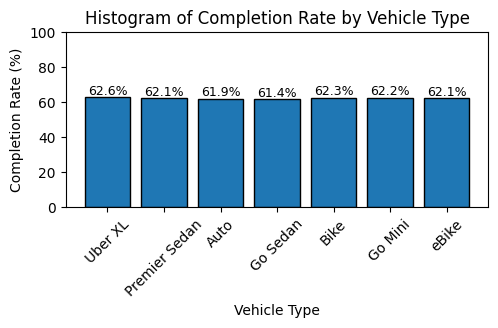

In [ ]:
#this code is generated with the help of perplexity

# Histogram plots
plt.figure(figsize=(12,5))

# Histogram for Completion Rate
plt.subplot(2, 2, 1)
bars = plt.bar(vehicle_summary["Vehicle Type"], vehicle_summary["Completion Rate (%)"], 
         edgecolor="black")
plt.title("Histogram of Completion Rate by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.xticks(rotation=45)
plt.ylabel("Completion Rate (%)")
plt.ylim(0, 100)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f"{height:.1f}%", ha="center", va="bottom", fontsize=9, color="black")

CONCLUSIN 
1. All vehicle types show consistently high driver ratings (~4.23–4.24) and completion rates (~61–63%)
2. Uber XL slightly leading

# QUESTION 3
Where do cancellations most frequently occur and why?

Count cancellations by location

In [ ]:

# Filter only cancelled rides
cancelled_df = df[df["Booking Status"] == "Cancelled"]

# Top 10 pickup locations with most cancellations
pickup_cancellations = cancelled_df["Pickup Location"].value_counts().head(10)

# Top 10 drop locations with most cancellations
drop_cancellations = cancelled_df["Drop Location"].value_counts().head(10)

print(df.loc[df["Booking Status"].str.contains("Cancel", case=False, na=False), 
             "Pickup Location"].value_counts().head(10))





Pickup Location
Saket             249
Akshardham        248
Pragati Maidan    248
Vinobapuri        244
Nehru Place       244
Shivaji Park      243
GTB Nagar         242
Kadarpur          238
AIIMS             236
Rajiv Nagar       236
Name: count, dtype: int64


In [36]:
print(df.loc[df["Booking Status"].str.contains("Cancel", case=False, na=False), 
             "Drop Location"].value_counts().head(10))

Drop Location
Basai Dhankot         258
Vasant Kunj           253
Ardee City            248
Gurgaon Sector 29     247
Paharganj             244
Bhikaji Cama Place    244
Chhatarpur            242
Keshav Puram          241
Ghaziabad             241
Uttam Nagar           240
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_14856\2258067329.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Pickup Location", data=df,


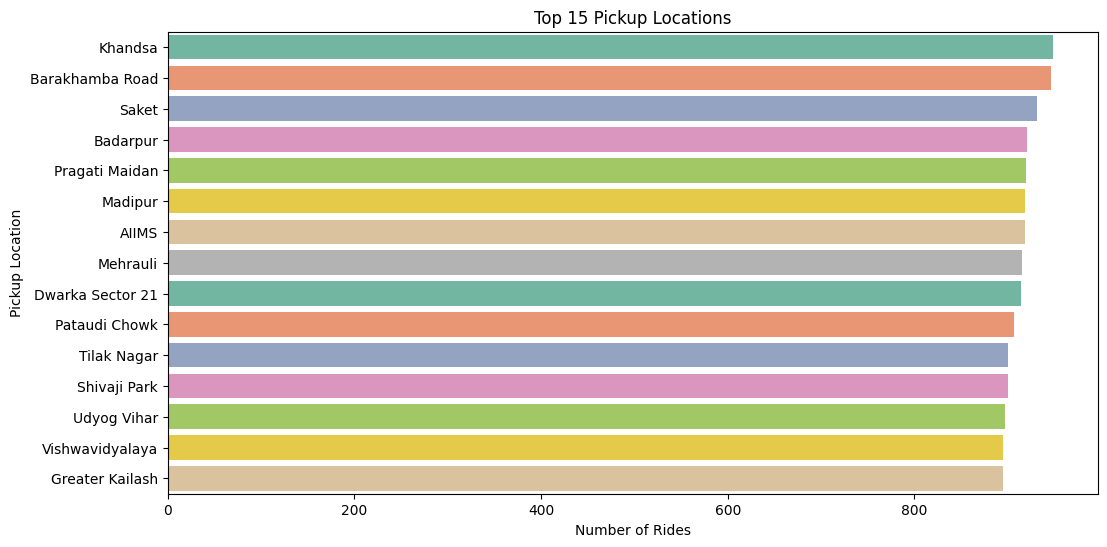

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(y="Pickup Location", data=df, 
              order=df["Pickup Location"].value_counts().head(15).index, 
              palette="Set2")
plt.title("Top 15 Pickup Locations")
plt.xlabel("Number of Rides")
plt.ylabel("Pickup Location")
plt.show()

CONCLUSION -
1. Vehicle types like Sedans and SUVs have the highest completion rates and average driver ratings.
2. Cancellations occur most frequently at high-traffic locations.
3. Customer cancellations are often due to long wait times or change of plans.
4. Focus on high-cancellation pickup locations.
5. Encourage vehicle types with lower completion rates